# Augmentatation

- Flingping : 자유반전
- Gray scale :  흑백, 또는 다른.. 색채널
- saturation : 색조(hue), 채도(saturation),명도(value)
- Brightness : 밝기
- Rotation 회전
- Center Crop

## tensorflow를 사용한 img augmentation

### library install

In [1]:
!pip install pillow

In [7]:
# 야옹이 이미지 다운
!wget https://aiffelstaticprd.blob.core.windows.net/media/documents/mycat.jpg

--2020-10-17 15:34:54--  https://aiffelstaticprd.blob.core.windows.net/media/documents/mycat.jpg
Resolving aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)... 52.239.148.4
접속 aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)|52.239.148.4|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 166695 (163K) [image/jpeg]
Saving to: ‘mycat.jpg.5’

mycat.jpg.5         100%[===================>] 162.79K  --.-KB/s    in 0.03s   

2020-10-17 15:34:54 (5.37 MB/s) - ‘mycat.jpg.5’ saved [166695/166695]



### library import

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os



### img import

In [2]:
sample_img_path = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/lms/03-GoingDeeper/02-agumentation/mycat.jpg'
sample_img_path

'/home/aiffel0042/aiffel/AIFFEL_LSG/lms/03-GoingDeeper/02-agumentation/mycat.jpg'

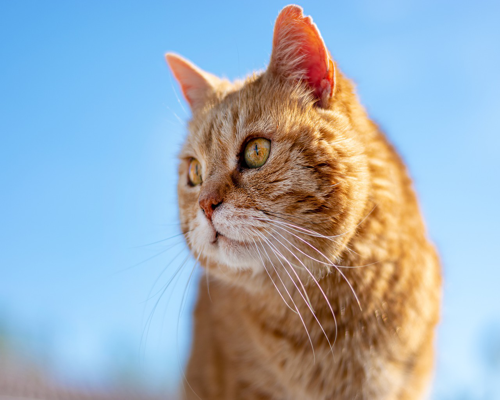

In [3]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### img flip

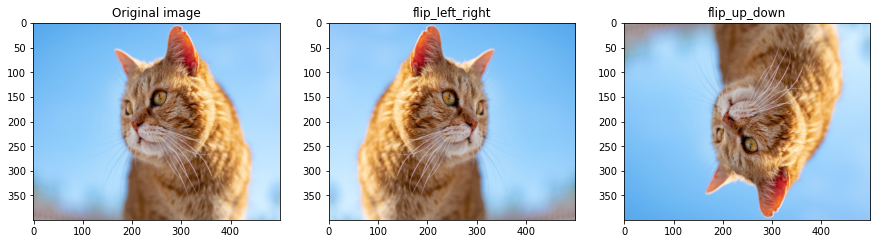

In [8]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

### centor crop

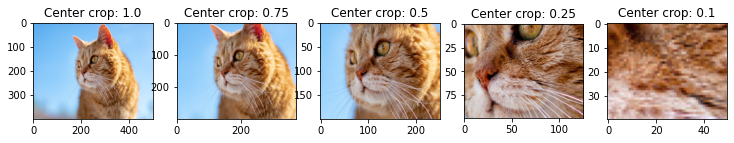

In [5]:
plt.figure(figsize=(15, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

In [9]:
## 랜덤하게 영역 크롭

In [10]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

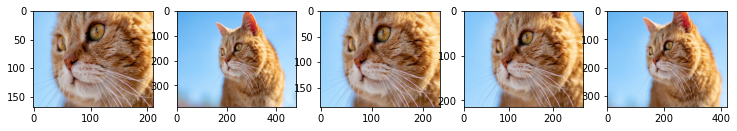

In [20]:
plt.figure(figsize=(15, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

### tf 활용 

In [21]:
# crop

In [22]:
## tf.image.rnadom_crop()
print(image_tensor.shape)

central_fractions

(400, 500, 3)


[1.0, 0.75, 0.5, 0.25, 0.1]

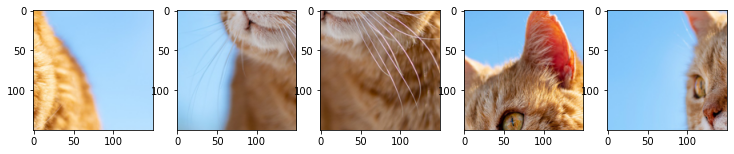

In [23]:

col = 5

plt.figure(figsize=(15, 15))
for i in range(5):
    cropped_tensor =tf.image.random_crop(image_tensor, (150,150,3))
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)


In [ ]:
### 밝기 조절.

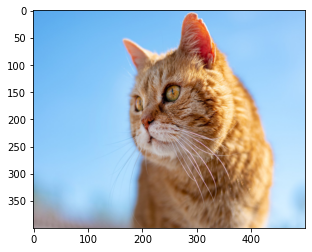

In [39]:
cropped_tensor = tf.image.random_brightness(image_tensor, max_delta=0.1)
cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)

plt.imshow(cropped_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


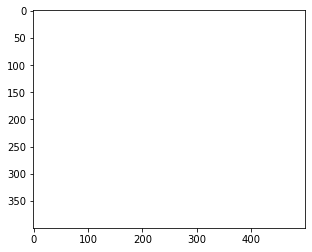

In [35]:
cropped_tensor = tf.image.random_brightness(image_tensor, max_delta=255)
plt.imshow(cropped_tensor)

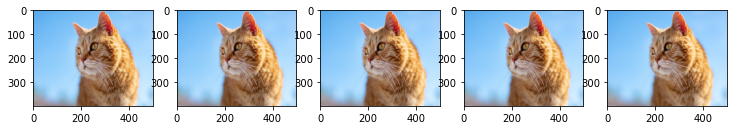

In [40]:
plt.figure(figsize=(15, 15))

col = 5
for i in range(5):
    cropped_tensor = tf.image.random_brightness(image_tensor, max_delta=255)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

##  imgaug 라이브러리

### install

In [42]:
!pip install -q imgaug

### library improt

In [45]:
import numpy as np
import imgaug.augmenters as iaa


# <<imgaug< 는 num py <배열 이미지 를 기본형태로 함 그래서 변환.
image_arr = np.array(image)

In [ ]:
# 아핀?
#iaa.Affine() 


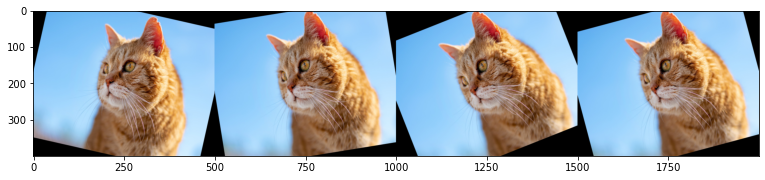

In [46]:
# -25 ~ 25 도 사이를 랜덤하게 각도를 변환

images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25, 25)) #######
images_aug = rotate(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

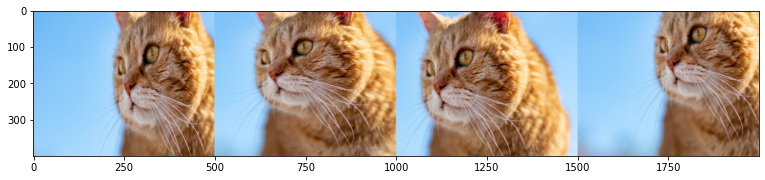

In [48]:
# iaa.crop)
# 매개변수에 따라  비율 이미지를 크롭.?

images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0, 0.3)) #
images_aug = crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

In [50]:
## iaa.Sequential()
## rotate , crop< 적용.

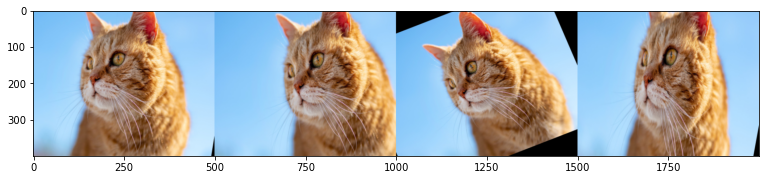

In [51]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

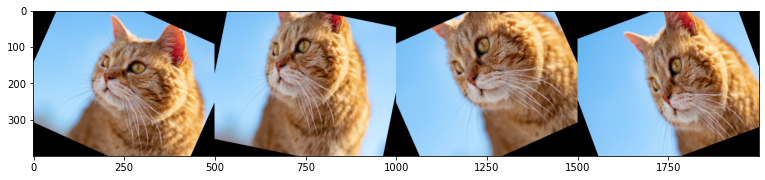

In [52]:
## sequnece random

images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
], random_order=True  ## <랜덤 옵션..
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

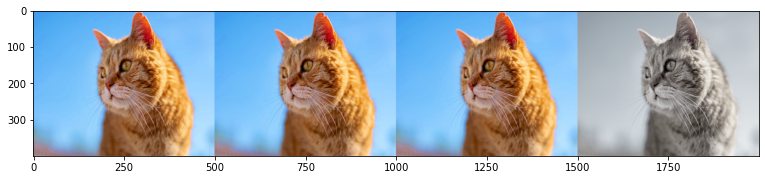

In [53]:
## option <택1
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([ ## <<<<Oneof 택 1
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

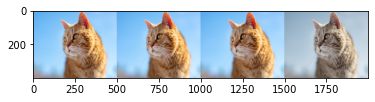

In [60]:
## 확률 배정

# Use iaa.SomeTimes with AddToSaturation & Grayscale

images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
    iaa.Sometimes(
        0.2,
     iaa.Grayscale(alpha=(0.0, 1.0))
    ) ,
    iaa.Sometimes( ## 
         0.6, 
         iaa.AddToSaturation((-50, 50))
     )
])
images_aug = seq(images=images)
plt.imshow(np.hstack(images_aug))

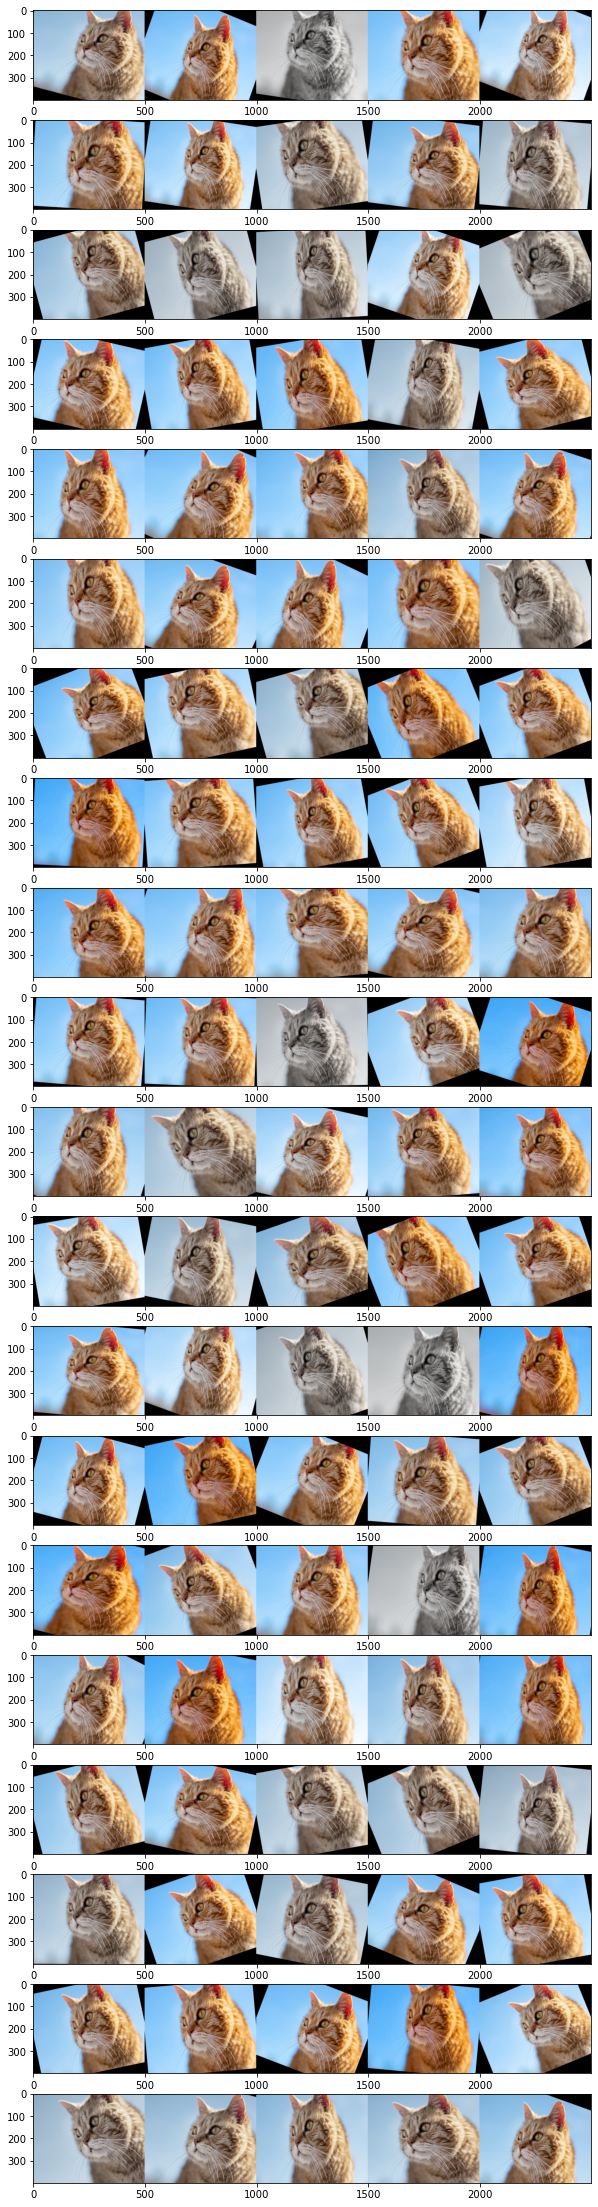

In [61]:
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(10, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))

plt.show()